### Load Data

In [1]:

import pandas as pd

# Load data
data = pd.read_csv("student-mat.csv", delimiter=';')
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Define Features and Target Variable

In [2]:

# Define features and target variable
X = data[['studytime', 'G1', 'G2']]  # Use only the specified features
y = data['G3']  # G3 is the target variable
X.head(), y.head()


(   studytime  G1  G2
 0          2   5   6
 1          2   5   5
 2          2   7   8
 3          3  15  14
 4          2   6  10,
 0     6
 1     6
 2    10
 3    15
 4    10
 Name: G3, dtype: int64)

### Scale Numeric Features

In [3]:

from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features
X_scaled[:5]  # Display the first 5 rows of scaled features


array([[-0.04228585, -1.78246688, -1.25479105],
       [-0.04228585, -1.78246688, -1.52097927],
       [-0.04228585, -1.1791469 , -0.72241461],
       [ 1.15077909,  1.23413302,  0.87471471],
       [-0.04228585, -1.48080689, -0.19003817]])

### Split Data into Training, Validation, and Test Sets

In [4]:

from sklearn.model_selection import train_test_split

# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
(X_train.shape, X_val.shape, X_test.shape)


((237, 3), (79, 3), (79, 3))

### Check Assumptions for Linear Regression

#### 1. Linearity Check

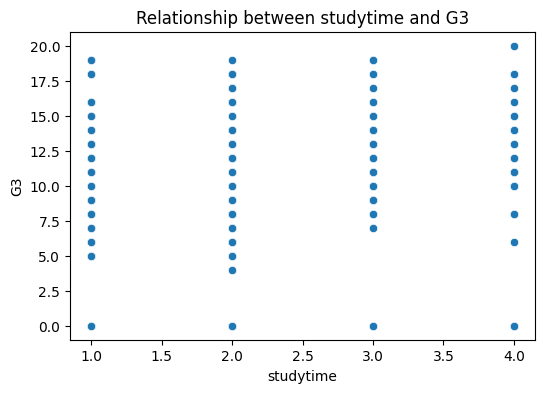

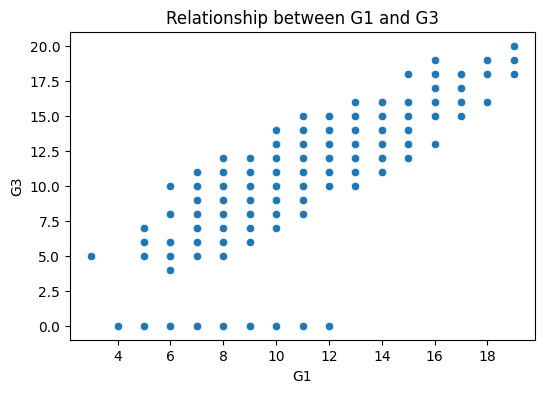

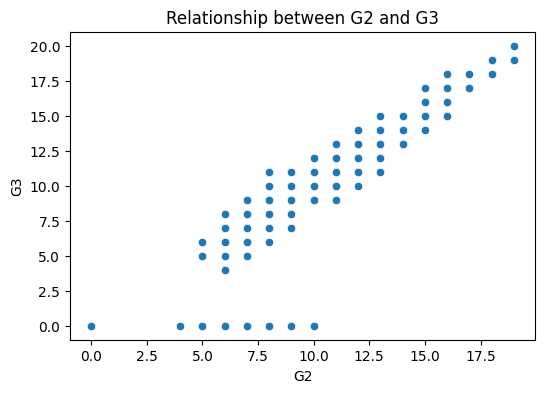

In [5]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define features and target variable
features = ['studytime', 'G1', 'G2']
target = 'G3'
data = pd.read_csv("student-mat.csv", delimiter=';')

# Plot each feature independently against the target variable
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y=target)
    plt.title(f'Relationship between {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


#### 2. Residual Plot Function (For Normality Check)

In [6]:

def plot_residuals(model, X, y):
    residuals = y - model.predict(X)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.show()


### Train and Validate Initial Ridge Model

In [7]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train model using Ridge regression to modify hyperparameter alpha
ridge_model = Ridge(alpha=1.0)  # Initial α value
ridge_model.fit(X_train, y_train)

# Validate the model
y_val_pred = ridge_model.predict(X_val)

# Evaluate model on validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", val_mse)
print("Validation R-squared:", val_r2)


Validation Mean Squared Error: 2.6537684385843145
Validation R-squared: 0.8542832234277256


### Hyperparameter Tuning with GridSearchCV

In [8]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Best parameters
print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge MSE (CV):", -ridge_grid.best_score_)


Best Ridge Alpha: {'alpha': 0.01}
Best Ridge MSE (CV): 3.504485787650419


### Retrain with Best Alpha and Evaluate on Test Set

Test Mean Squared Error: 5.548233052554348
Test R-squared: 0.7783930926900667


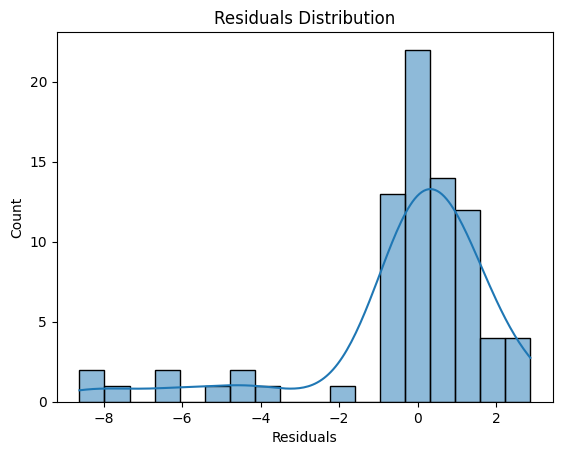

In [9]:

# Retrain with best alpha
best_ridge_model = Ridge(alpha=ridge_grid.best_params_['alpha'])
best_ridge_model.fit(X_train, y_train)

# Test the best model
y_test_pred = best_ridge_model.predict(X_test)

# Evaluate performance on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error:", test_mse)
print("Test R-squared:", test_r2)

# Plot residuals for the best model
plot_residuals(best_ridge_model, X_test, y_test)
